In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Income_dist.csv')
df

,Iceland,Denmark,Croatia,Slovenia,United Arab Emirates,Saudi,Iraq,Kuwait,Canada,USA,...,India,Bangladesh,Sri Lanka,Nepal,South Korea,Singapore,Brazil,Chile,Peru,Colombia
0,2.20,1.63,0.65,1.18,0.95,1.13,0.42,2.18,0.10,0.42,...,1.61,1.94,1.45,1.76,0.66,1.89,0.00,0.00,0.00,0.00
1,4.44,3.69,2.99,4.13,1.93,1.83,2.54,3.24,1.77,1.74,...,2.49,3.02,2.35,2.89,2.21,2.94,0.41,0.21,0.32,0.04
2,5.86,4.77,4.24,5.20,2.62,2.37,3.65,3.84,3.59,2.69,...,3.03,3.81,3.05,3.65,4.06,3.76,1.86,1.72,1.70,1.12
3,6.90,5.72,5.45,6.25,3.33,2.92,4.57,4.25,5.16,3.69,...,3.54,4.63,3.79,4.52,6.07,4.55,2.93,2.78,2.87,2.19
4,7.87,7.02,6.86,7.44,5.06,3.74,5.66,5.13,6.64,4.89,...,4.09,5.54,4.65,5.58,8.03,5.41,3.93,3.96,4.04,3.03
5,8.88,8.47,8.40,8.73,6.29,4.80,6.38,6.38,8.16,6.33,...,4.79,6.67,5.72,6.78,9.62,6.43,4.62,5.04,5.21,4.21
6,10.08,9.82,10.16,10.28,7.57,6.35,7.75,7.59,9.93,8.14,...,5.66,8.21,7.18,8.41,10.57,7.68,5.63,6.38,6.65,5.30
7,11.66,11.45,12.36,12.19,9.36,8.59,9.19,9.47,12.27,10.57,...,6.95,10.34,9.27,10.67,10.81,9.41,7.99,8.58,8.63,7.71
8,13.86,14.33,15.39,15.16,14.26,13.58,14.73,13.86,15.91,14.76,...,9.40,14.09,13.19,14.78,11.07,12.76,13.42,13.56,12.63,15.47
9,28.24,33.10,33.50,29.44,48.63,54.70,45.11,44.06,36.47,46.76,...,58.46,41.76,49.34,40.96,36.89,45.17,59.21,57.76,57.95,60.93


# Income Distribution of countries

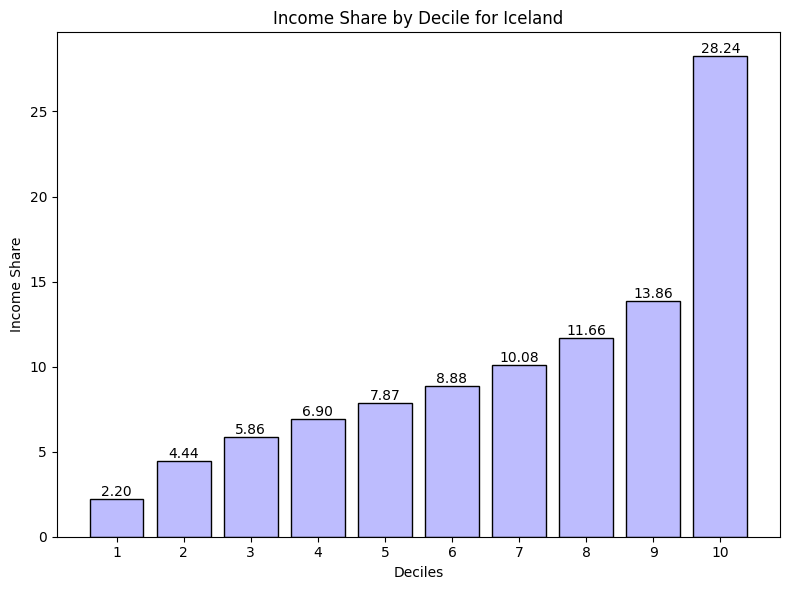

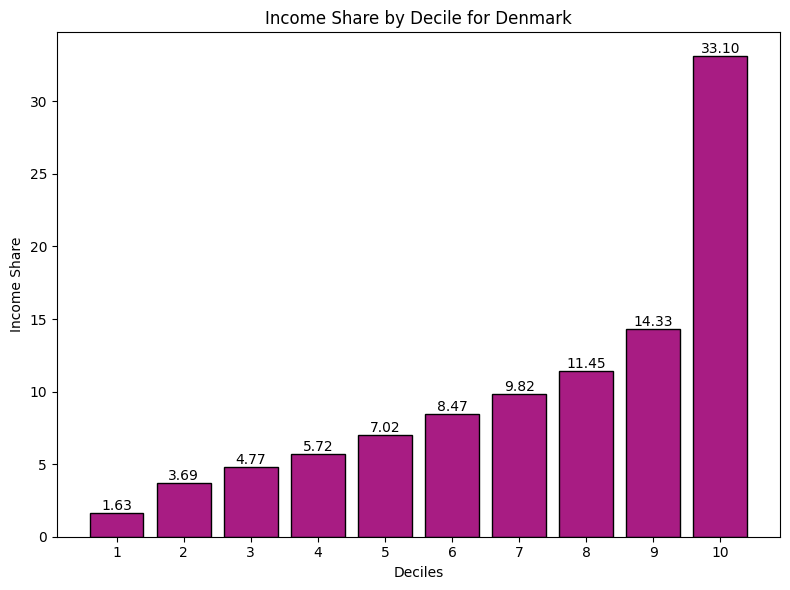

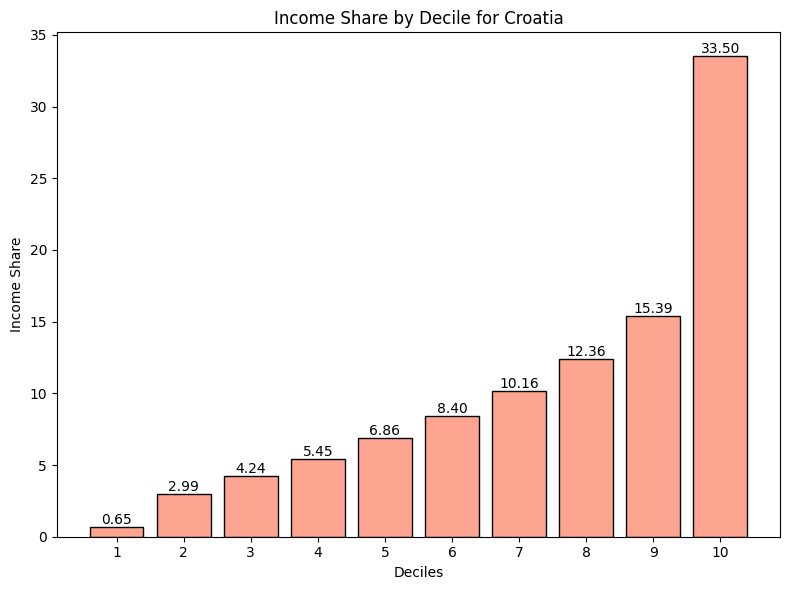

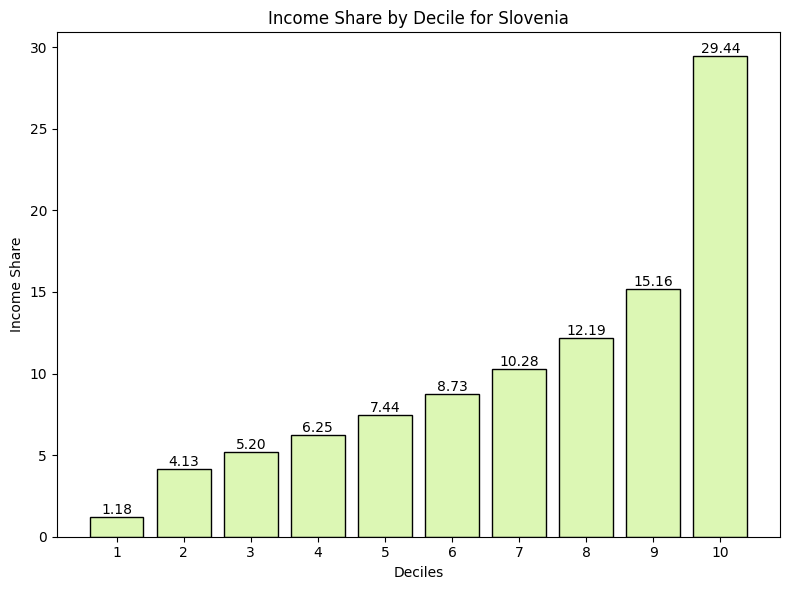

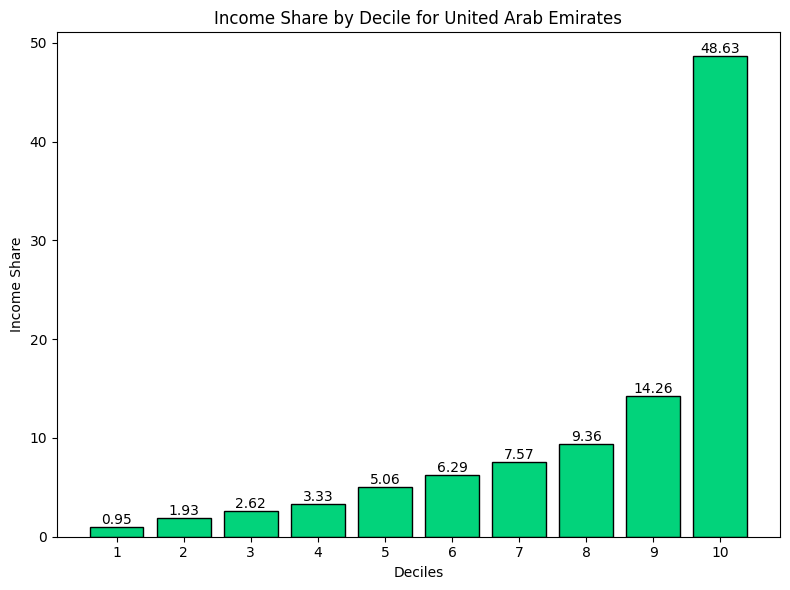

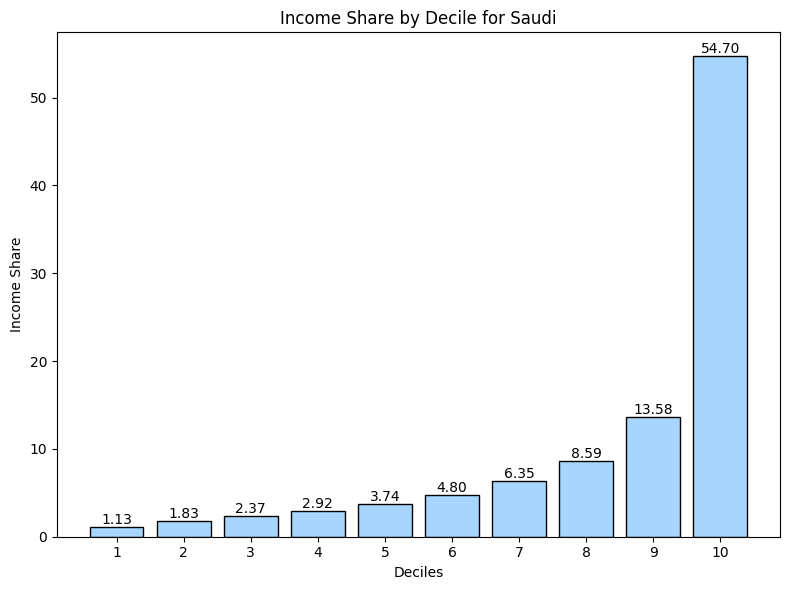

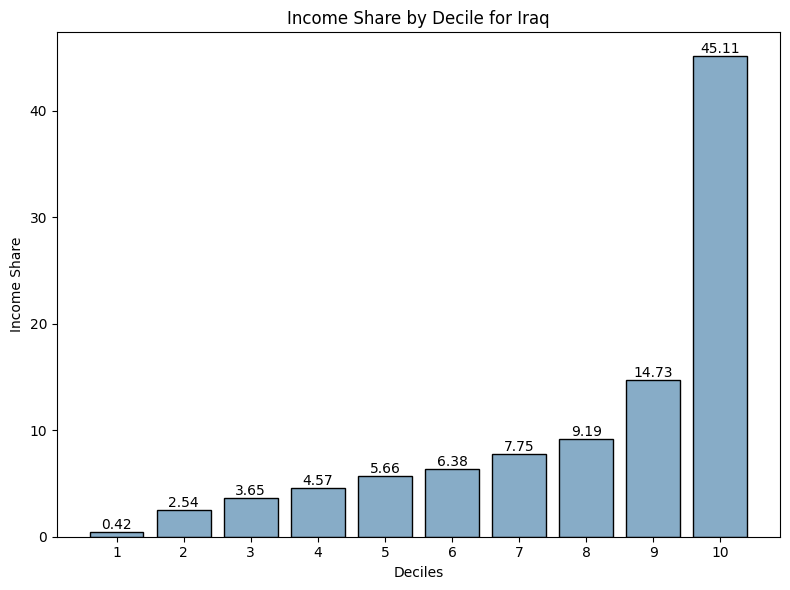

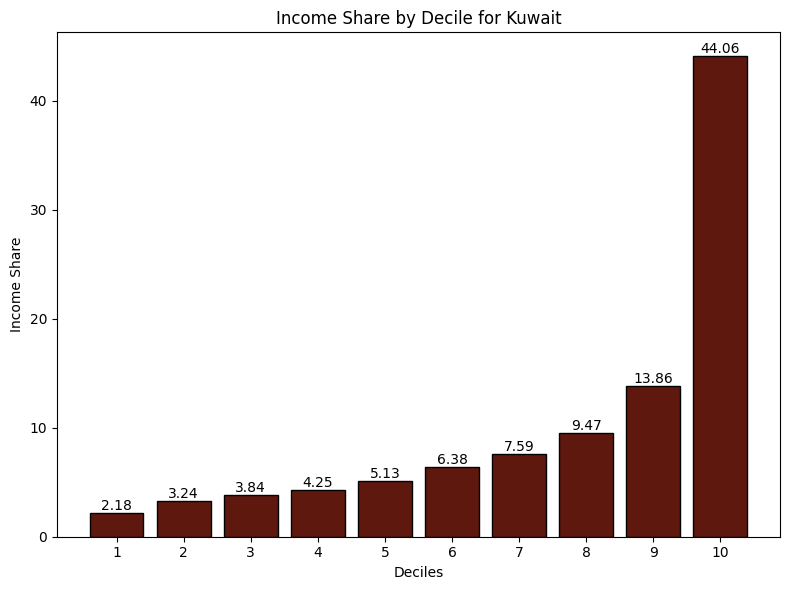

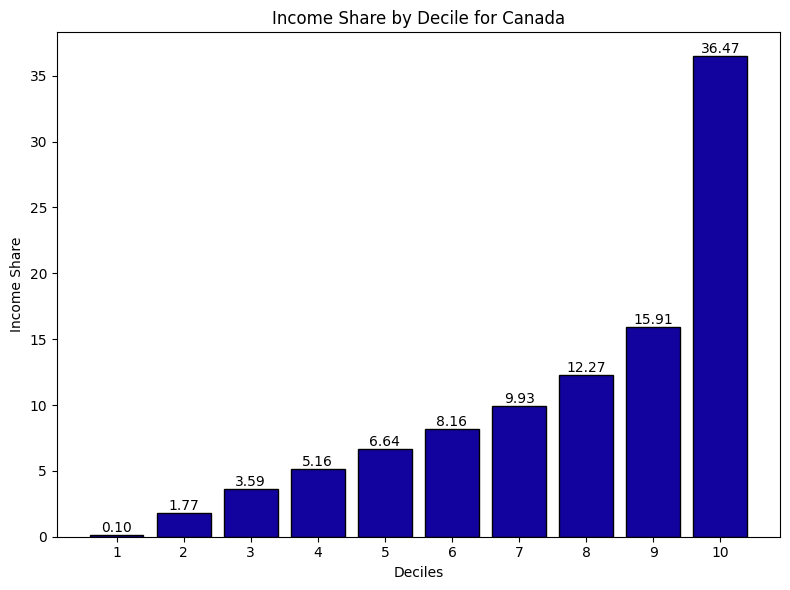

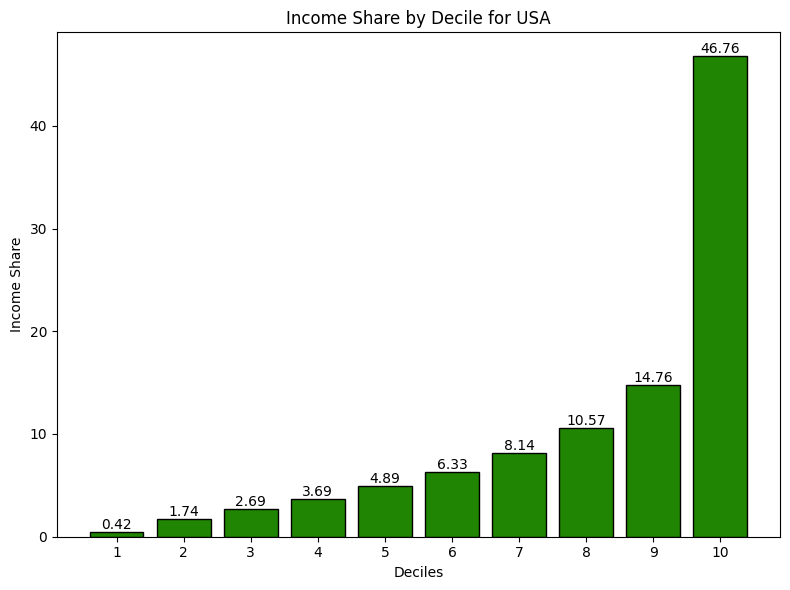

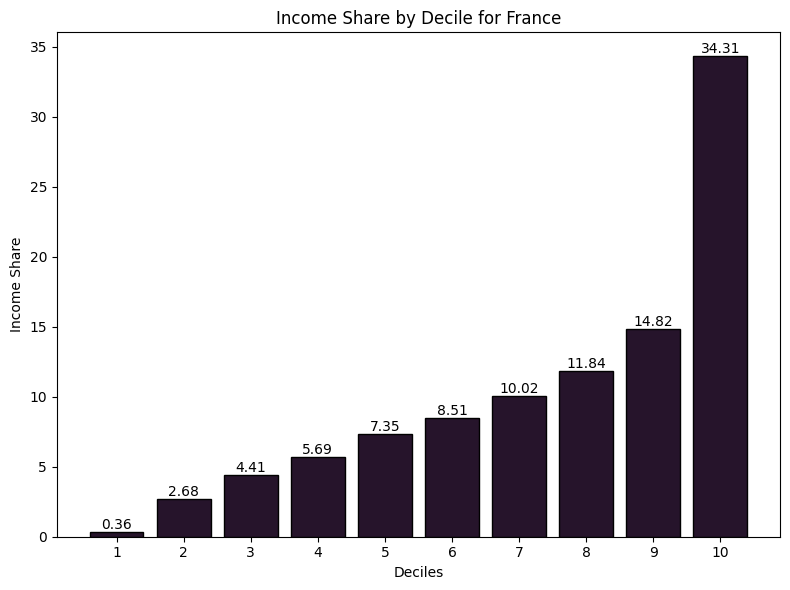

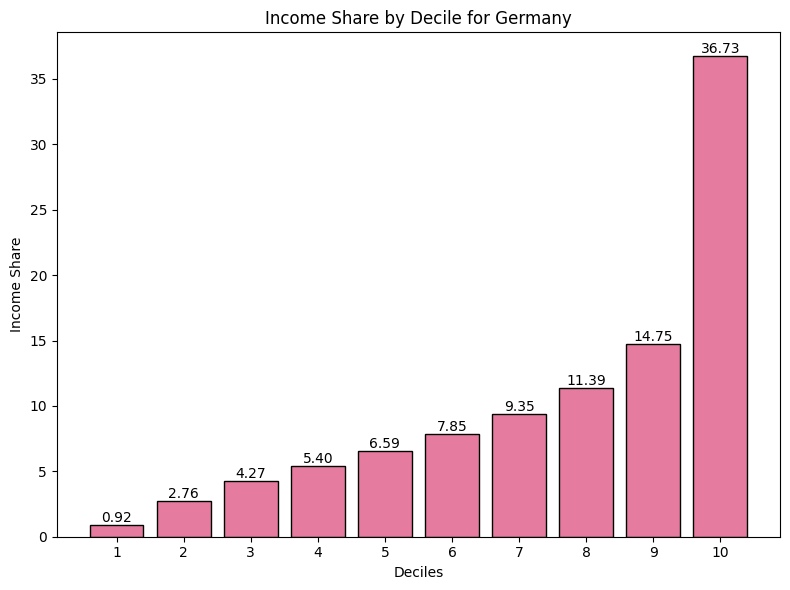

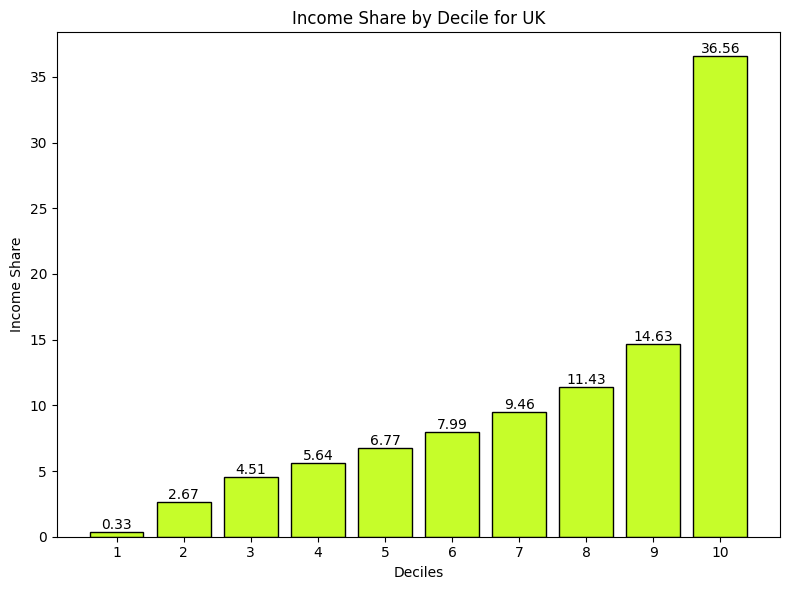

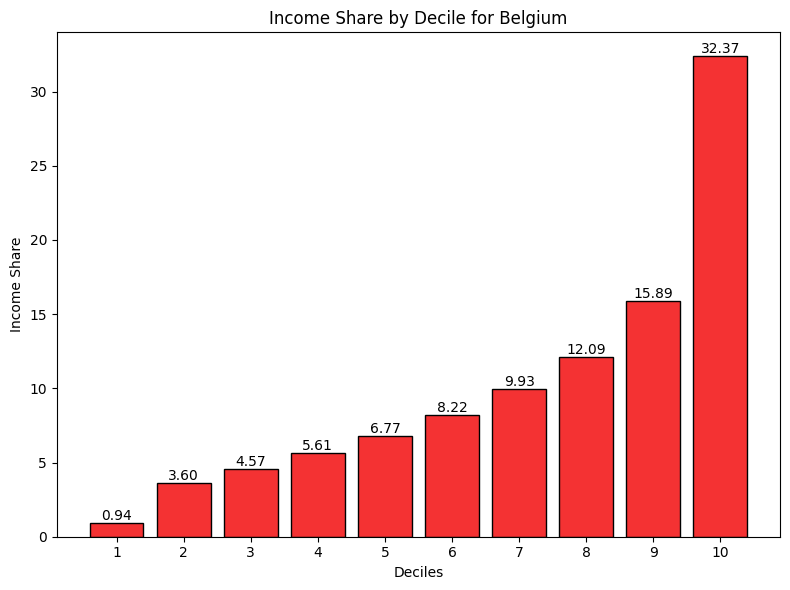

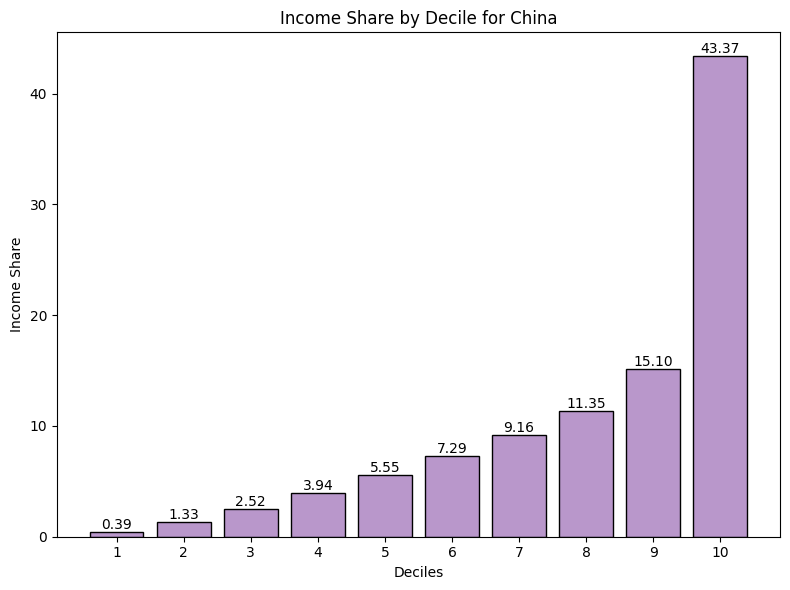

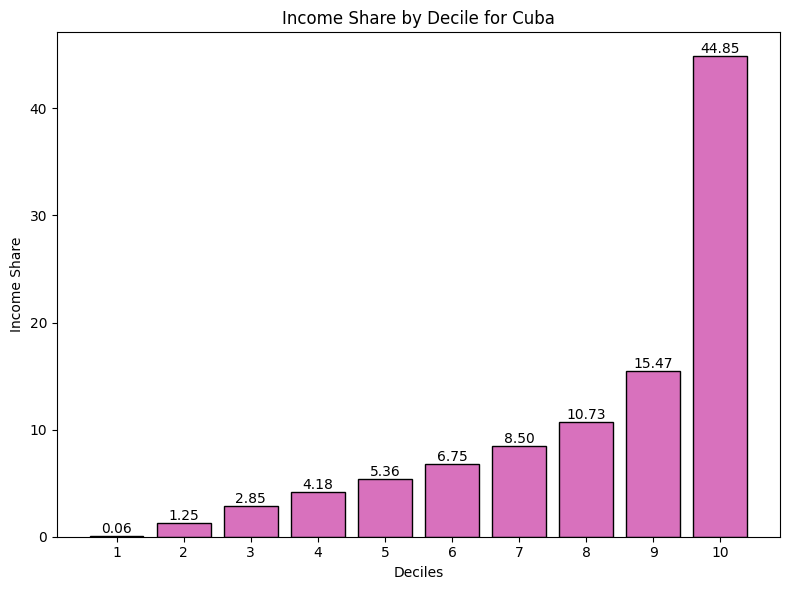

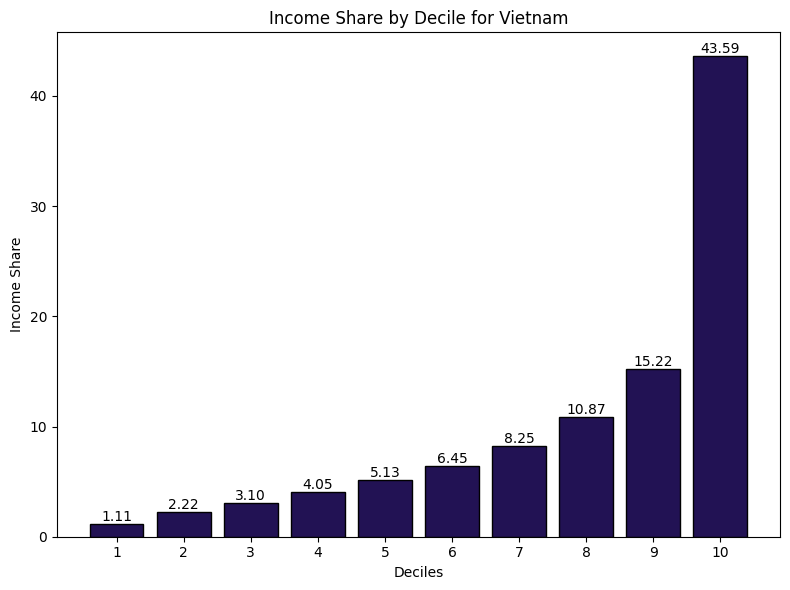

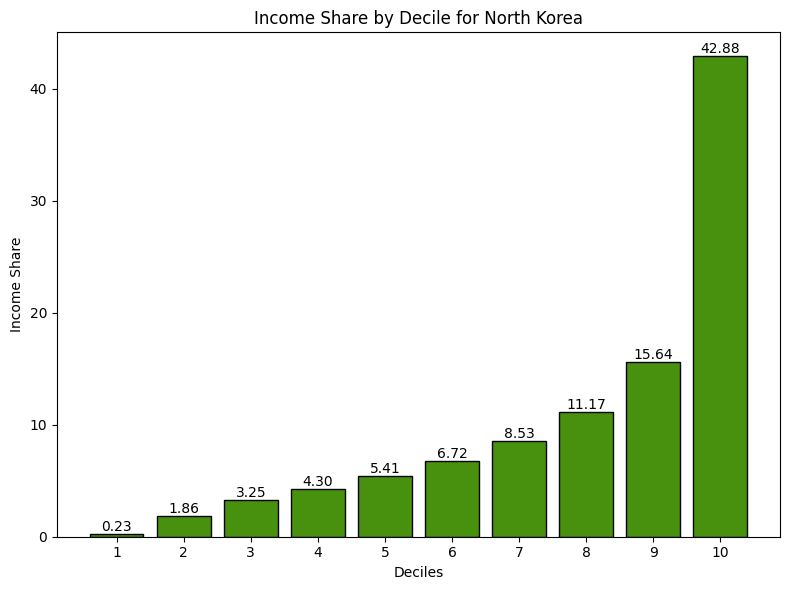

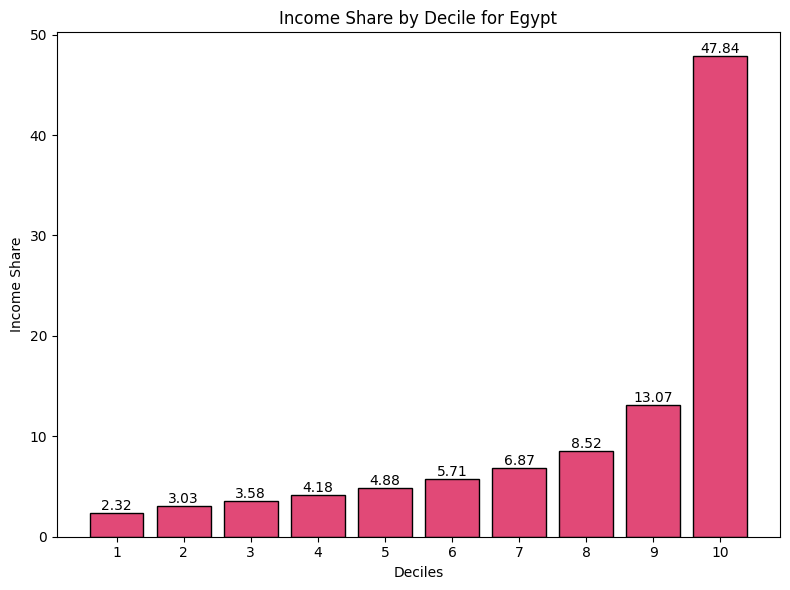

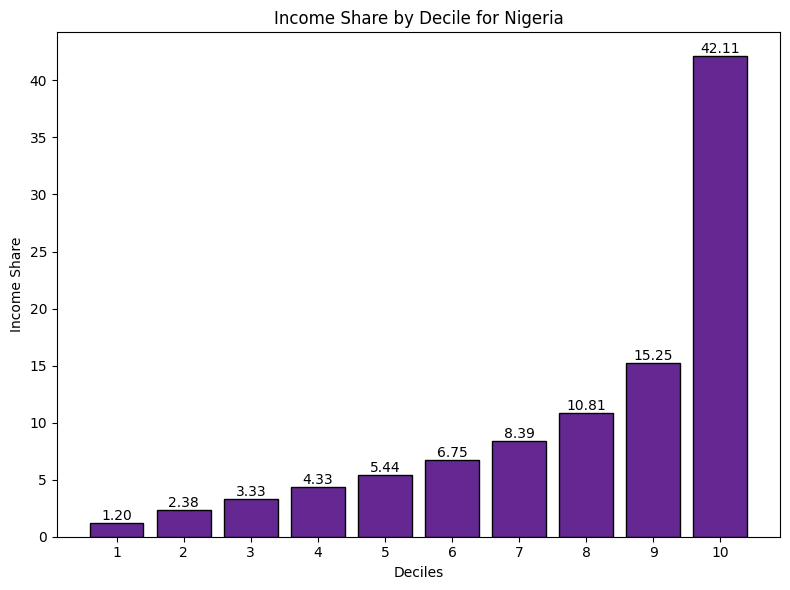

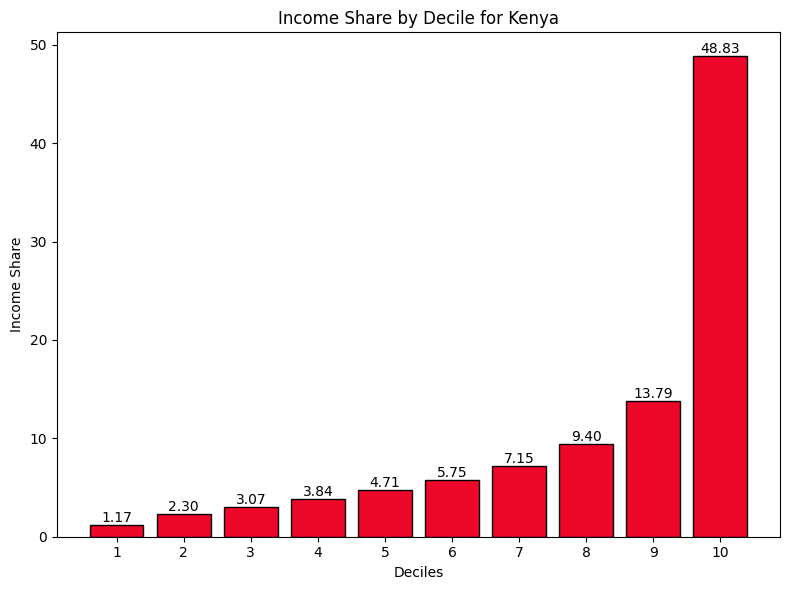

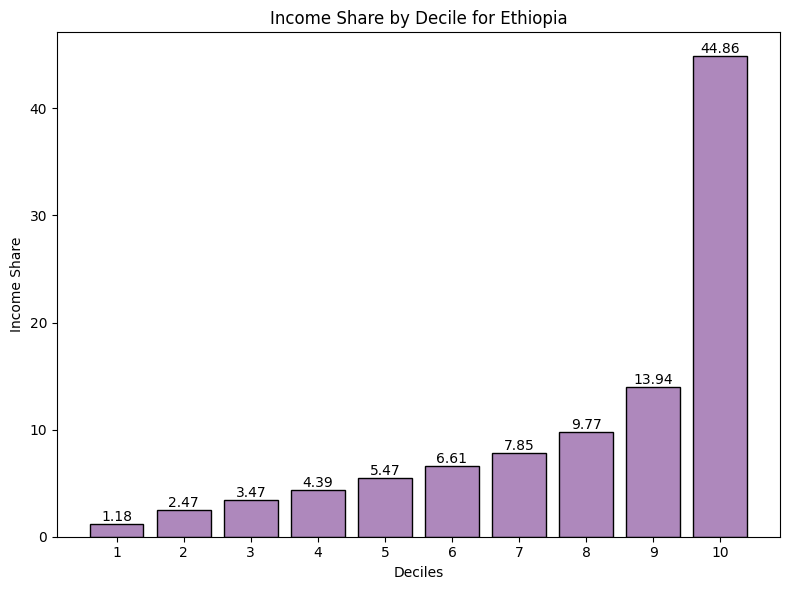

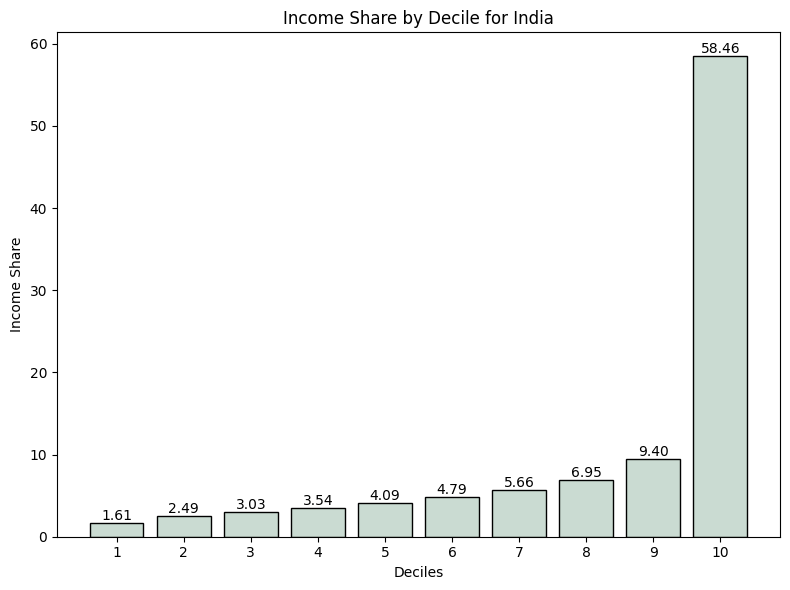

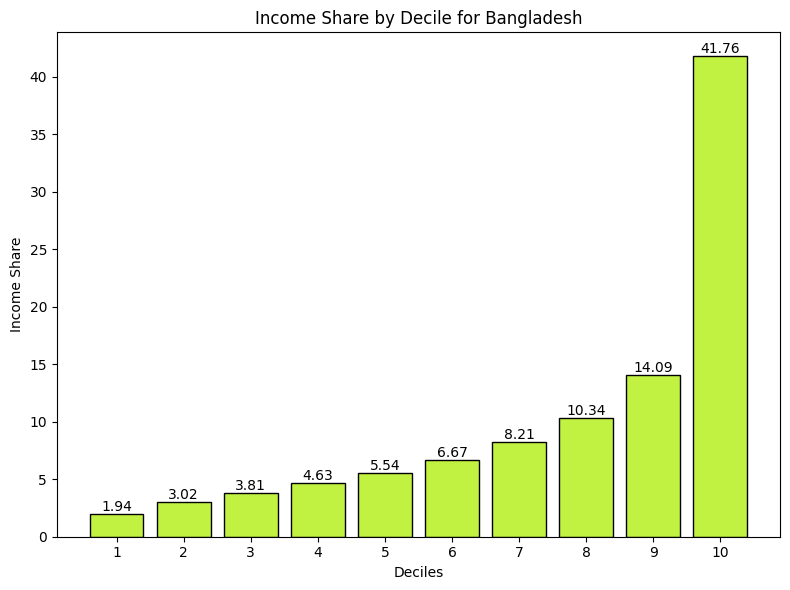

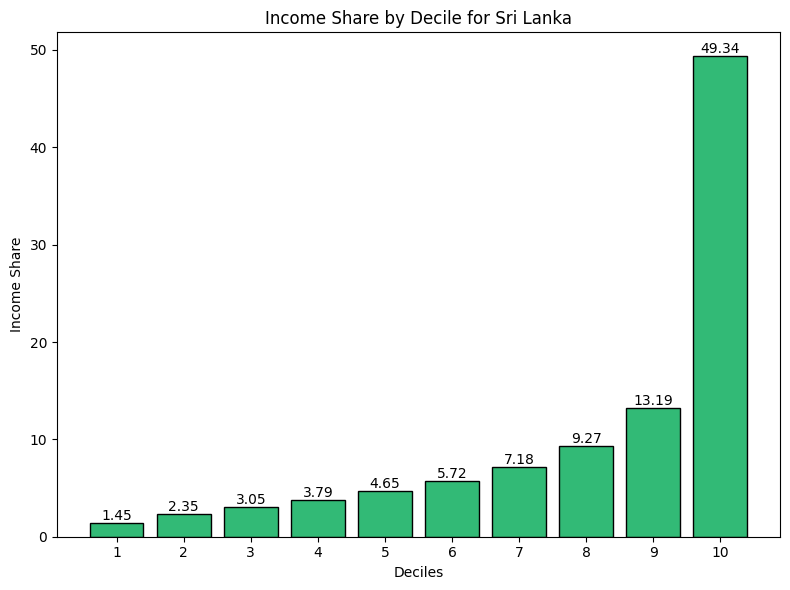

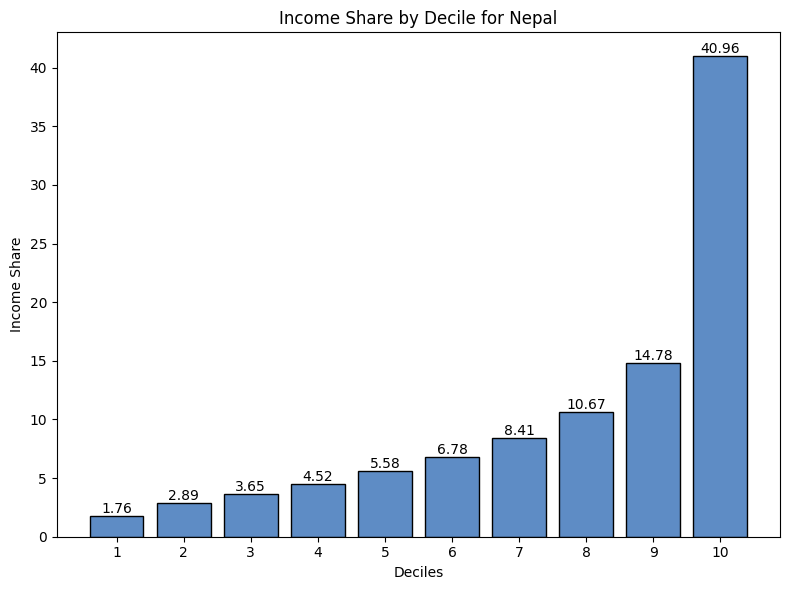

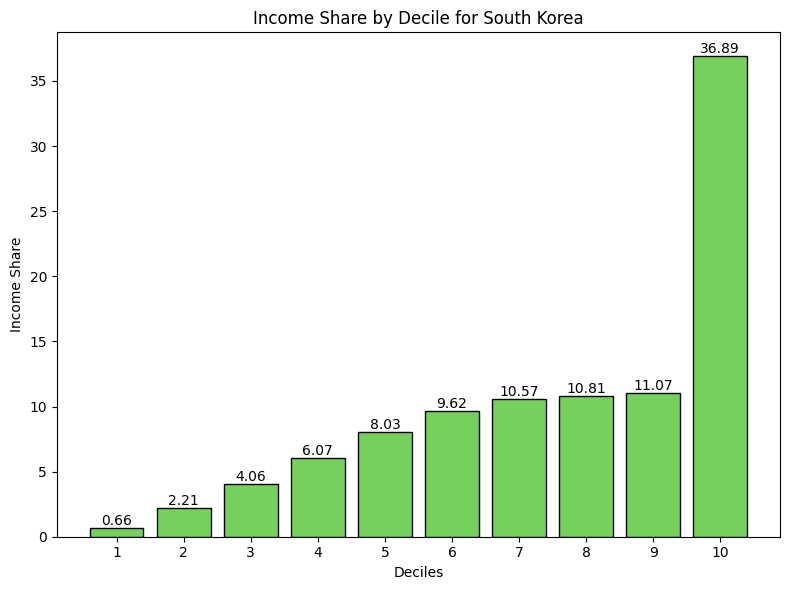

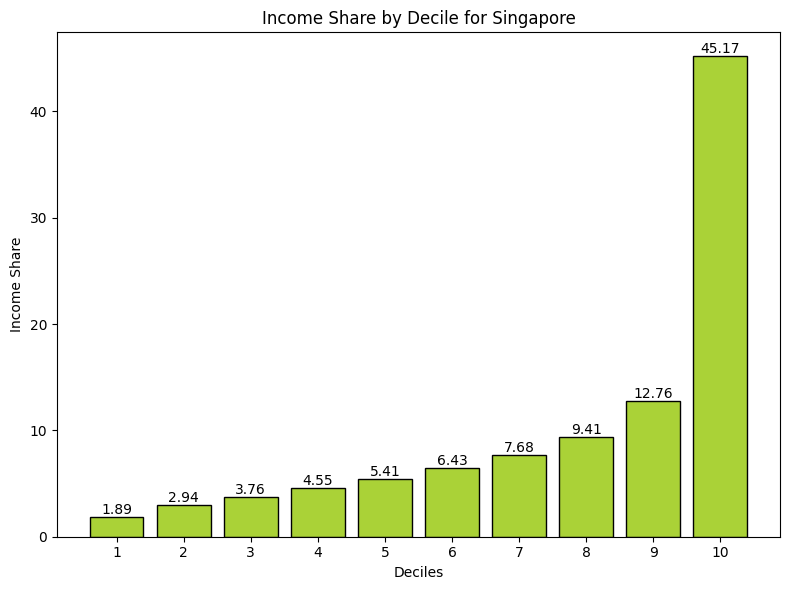

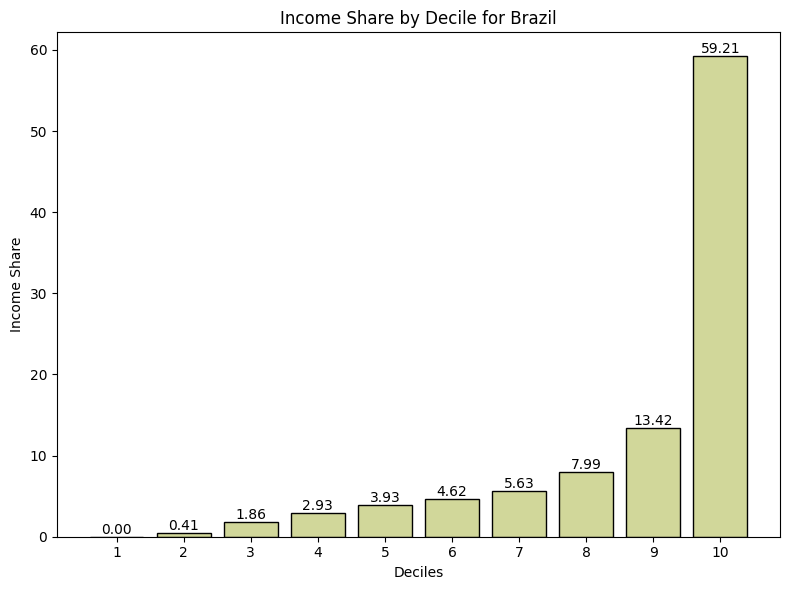

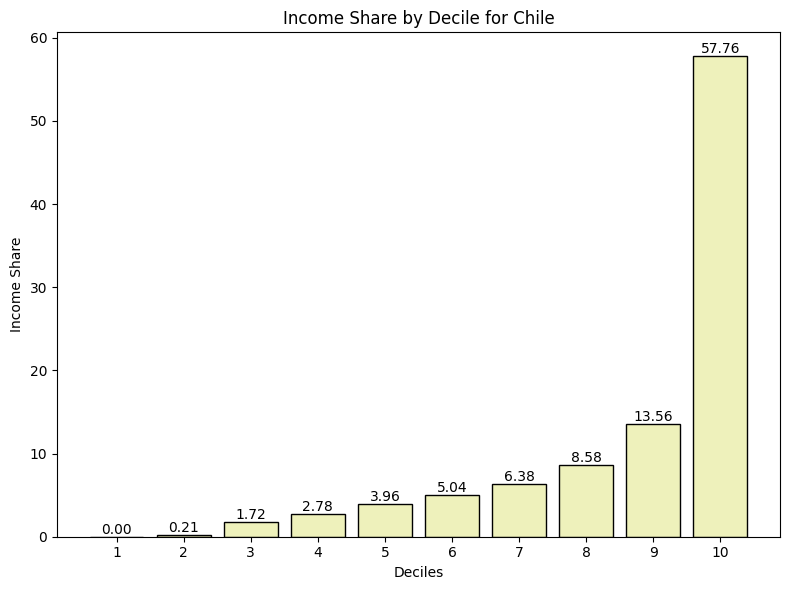

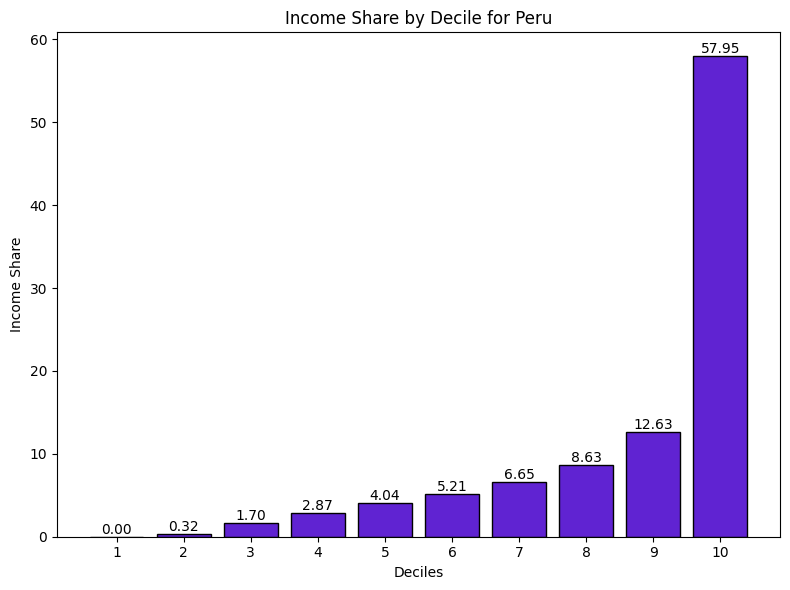

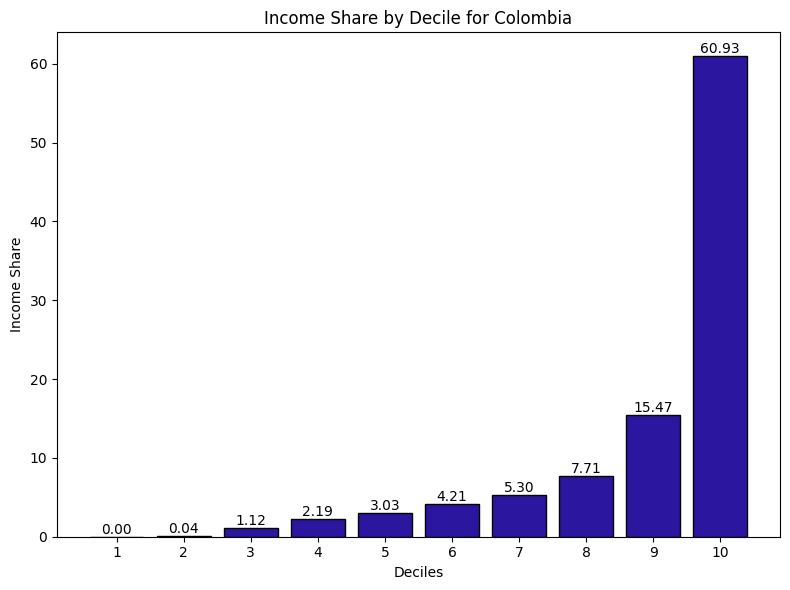

In [3]:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    plt.bar(df.index + 1, df[column], color=np.random.rand(3,), edgecolor='black')
    plt.xlabel("Deciles")
    plt.ylabel("Income Share")
    plt.title(f"Income Share by Decile for {column}")
    plt.xticks(list(range(1, 11)))

    # Add income share values on top of bars
    for i, value in enumerate(df[column]):
        plt.text(i + 1, value, f"{value:.2f}", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Average Entropy of each category of countries

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


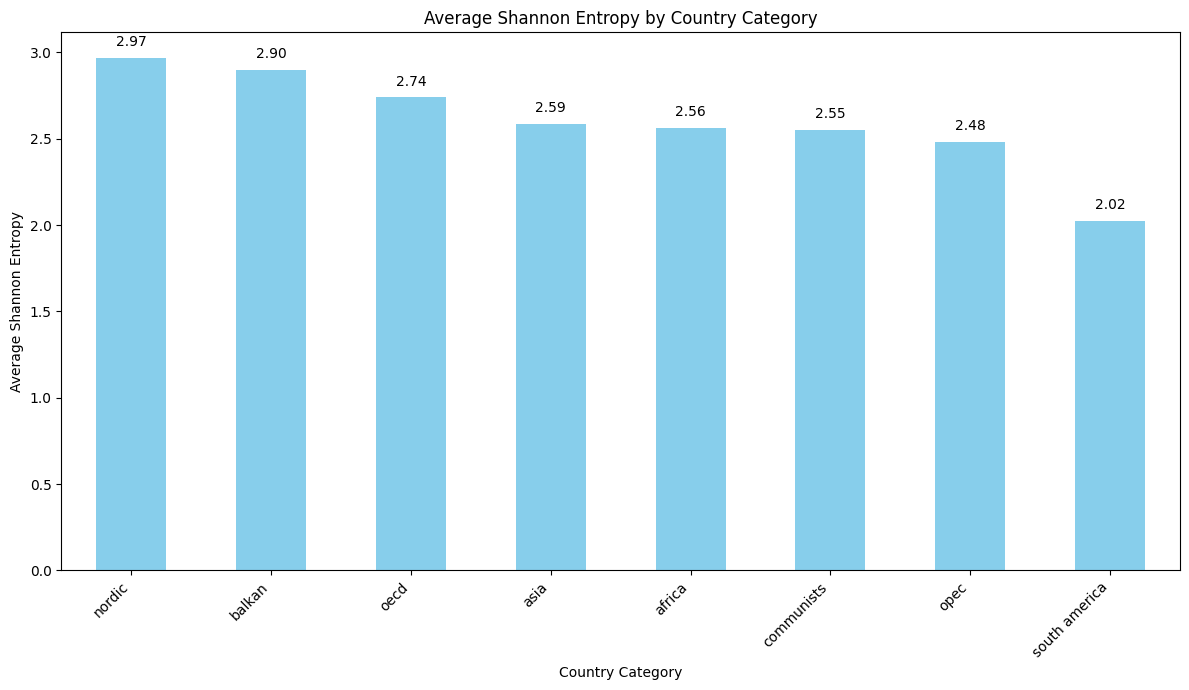

In [4]:
country_categories = {
    'nordic': ['Iceland', 'Denmark'],
    'balkan': ['Croatia', 'Slovenia'],
    'opec': ['United Arab Emirates', 'Saudi', 'Iraq', 'Kuwait'],
    'oecd': ['Canada', 'USA', 'France', 'Germany', 'UK', 'Belgium'],
    'communists': ['China', 'Cuba', 'Vietnam', 'North Korea'],
    'africa': ['Egypt', 'Nigeria', 'Kenya', 'Ethiopia'],
    'asia': ['India', 'Bangladesh', 'Sri Lanka', 'Nepal', 'South Korea', 'Singapore'],
    'south america': ['Brazil', 'Chile', 'Peru', 'Colombia']
}

# Calculate Shannon entropy for each country
entropy_data = {}
for country in df.columns:
    pr = df[country] / np.sum(df[country] + 1e-8)
    # pr = pr[pr > 0] # Filter out probabilities of 0
    Sh = -np.sum(pr * np.log2(pr))
    entropy_data[country] = Sh

# Create a DataFrame from the entropy data
entropy_df = pd.DataFrame.from_dict(entropy_data, orient='index', columns=['Shannon Entropy'])

# Add a 'Category' column based on the defined categories
category_list = []
for country in entropy_df.index:
    found_category = 'Other'
    for category, countries in country_categories.items():
        if country in countries:
            found_category = category
            break
    category_list.append(found_category)

entropy_df['Category'] = category_list

# Calculating the average entropy for each category
average_entropy_by_category = entropy_df.groupby('Category')['Shannon Entropy'].mean().sort_values(ascending=False)

# Visualize the average Shannon entropy by category
plt.figure(figsize=(12, 7))
ax = average_entropy_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Shannon Entropy by Country Category')
plt.xlabel('Country Category')
plt.ylabel('Average Shannon Entropy')
plt.xticks(rotation=45, ha='right')

# Add average values on top of the bars
for i, v in enumerate(average_entropy_by_category):
    ax.text(i, v + 0.05, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.savefig('avg_Sh.jpg')
plt.show()

# individual country entropy's grouped by category

In [5]:
print("Individual Country Shannon Entropy by Category:")
for category, countries in country_categories.items():
    print(f"\n{category.capitalize()}:")
    for country in countries:
        if country in entropy_df.index:
            print(f"  {country}: {entropy_df.loc[country, 'Shannon Entropy']:.4f}")

Individual Country Shannon Entropy by Category:

Nordic:
  Iceland: 3.0311
  Denmark: 2.9051

Balkan:
  Croatia: 2.8382
  Slovenia: 2.9628

Opec:
  United Arab Emirates: 2.4519
  Saudi: 2.2670
  Iraq: 2.5608
  Kuwait: 2.6485

Oecd:
  Canada: 2.7157
  USA: 2.4733
  France: 2.8172
  Germany: 2.7881
  UK: 2.7727
  Belgium: 2.8798

Communists:
  China: 2.5454
  Cuba: 2.4952
  Vietnam: 2.5922
  North Korea: 2.5711

Africa:
  Egypt: 2.5514
  Nigeria: 2.6417
  Kenya: 2.4715
  Ethiopia: 2.5931

Asia:
  India: 2.2258
  Bangladesh: 2.6984
  Sri Lanka: 2.4695
  Nepal: 2.7021
  South Korea: 2.7915
  Singapore: 2.6230

South america:
  Brazil: 2.0386
  Chile: 2.0705
  Peru: 2.0808
  Colombia: 1.9048


# Income distribution of one country in each category

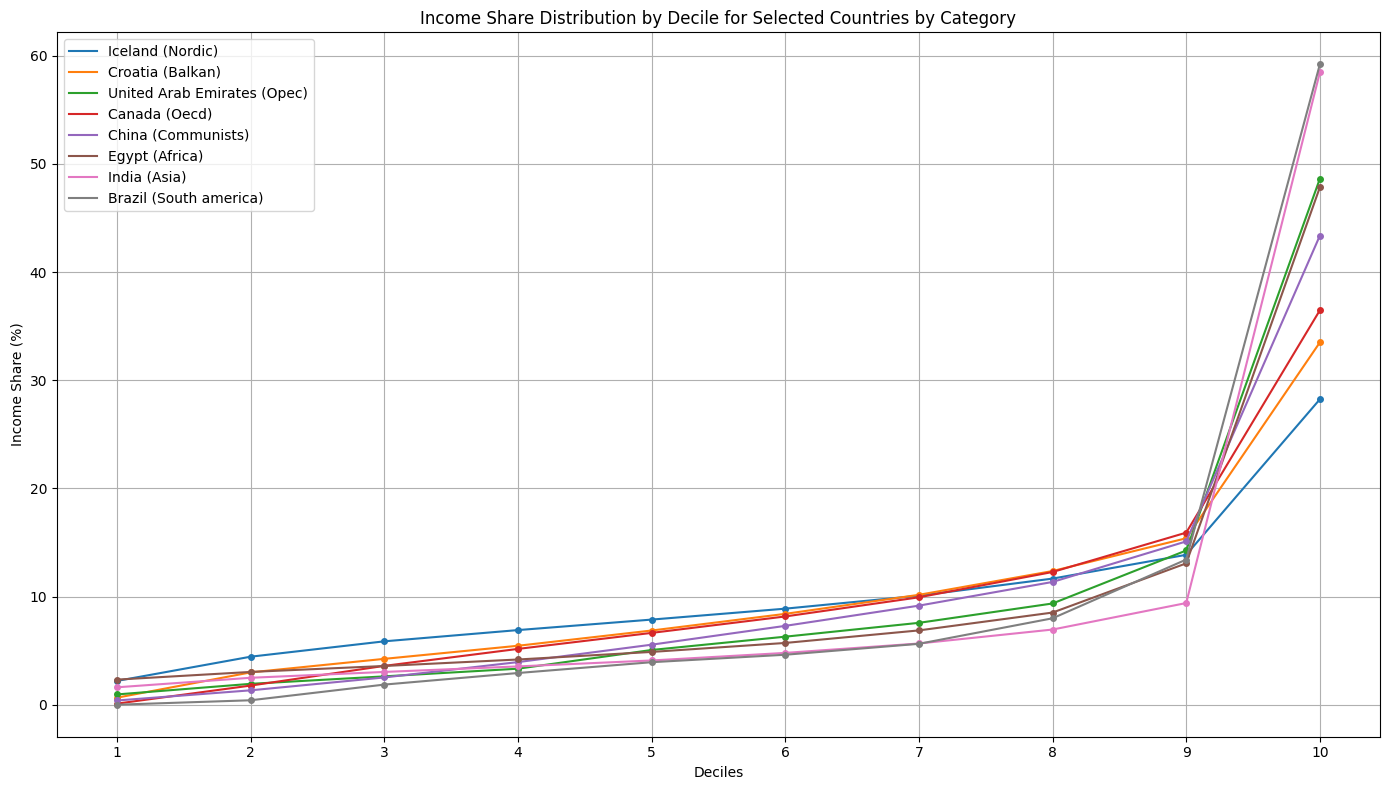

In [6]:
plt.figure(figsize=(14, 8))

# selecting one country from each category
selected_countries = {}
for category, countries in country_categories.items():
    if countries:
        selected_countries[category] = countries[0] # selecting the first country from the list

for category, country in selected_countries.items():
    if country in df.columns:
        line, = plt.plot(df.index + 1, df[country], linestyle='-', label=f'{country} ({category.capitalize()})')
        line_color = line.get_color()
        plt.plot(df.index + 1, df[country], '.', markersize=8, color=line_color)

plt.xlabel("Deciles")
plt.ylabel("Income Share (%)")
plt.title("Income Share Distribution by Decile for Selected Countries by Category")
plt.xticks(list(range(1, 11)))
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig('ID_plot.jpg')
plt.show()

/tmp/ipython-input-3380601123.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  ax.bar(df.index + 1, df[country], color=plt.cm.get_cmap('viridis', num_countries)(i), edgecolor='black')


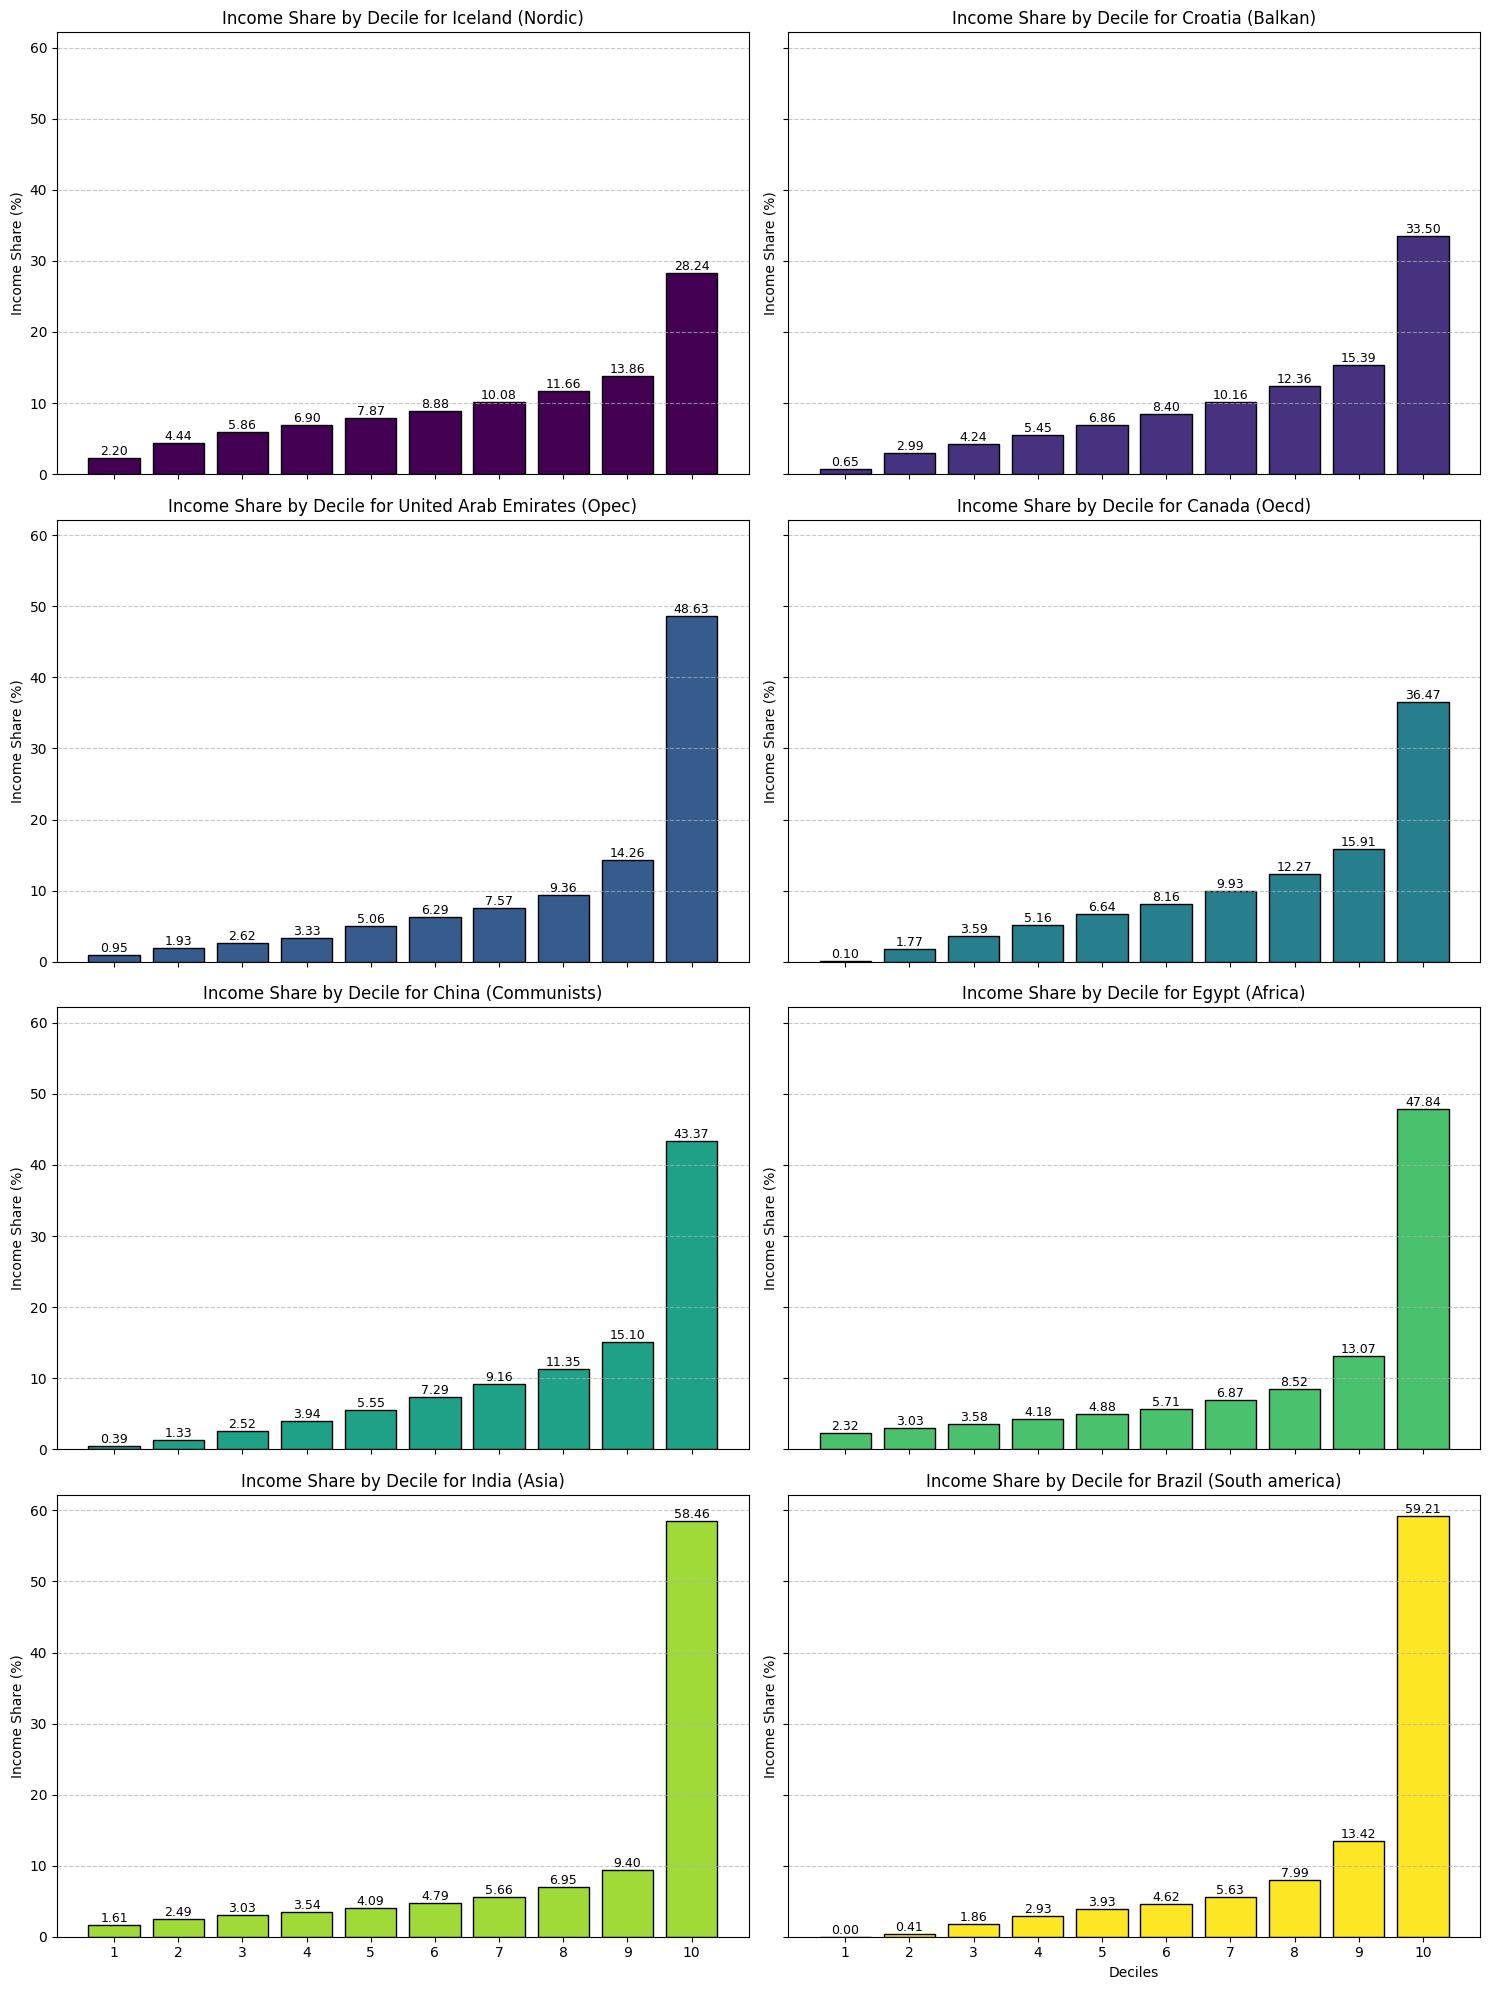

In [7]:
# Select one country from each category
selected_countries_for_plot = {}
for category, countries in country_categories.items():
    if countries:
        selected_countries_for_plot[category] = countries[0]

# Filter out countries that are not in the 'df' DataFrame
valid_countries_to_plot = {cat: country for cat, country in selected_countries_for_plot.items() if country in df.columns}

num_countries = len(valid_countries_to_plot)

# Create a (num_countries // 2) x 2 subplot grid
# This will arrange the plots in 2 columns, with enough rows to fit all countries
fig, axes = plt.subplots(nrows=(num_countries + 1) // 2, ncols=2, figsize=(15, 5 * num_countries // 2), sharex=True, sharey=True)

# Flatten the axes array if it's 2D for easier iteration
axes = axes.flatten()

for i, (category, country) in enumerate(valid_countries_to_plot.items()):
    ax = axes[i]

    # Plot bar chart
    ax.bar(df.index + 1, df[country], color=plt.cm.get_cmap('viridis', num_countries)(i), edgecolor='black')

    # Add income share values on top of bars
    for j, value in enumerate(df[country]):
        ax.text(j + 1, value, f"{value:.2f}", ha='center', va='bottom', fontsize=9)

    ax.set_title(f'Income Share by Decile for {country} ({category.capitalize()})')
    ax.set_ylabel('Income Share (%)')
    ax.set_xticks(list(range(1, 11)))
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Hide any unused subplots
for i in range(num_countries, len(axes)):
    fig.delaxes(axes[i])

plt.xlabel("Deciles") # Set xlabel only once

plt.tight_layout()
plt.savefig('bar_plot.jpg')
plt.show()

# shannon entropy over the years for one country in each category

In [8]:
# Reload df1 from the CSV with the correct separator
df1 = pd.read_csv('/content/income-share-for-each-decile-before-tax.csv')

In [9]:
yearly_entropy_data = {}

# Select one country from each category
selected_countries_for_time_series = {}
for category, countries in country_categories.items():
    if countries:
        selected_countries_for_time_series[category] = countries[0]

print("Selected countries for yearly entropy calculation:", selected_countries_for_time_series)

Selected countries for yearly entropy calculation: {'nordic': 'Iceland', 'balkan': 'Croatia', 'opec': 'United Arab Emirates', 'oecd': 'Canada', 'communists': 'China', 'africa': 'Egypt', 'asia': 'India', 'south america': 'Brazil'}


In [11]:
for category, country in selected_countries_for_time_series.items():
    yearly_entropy_data[country] = {}

    country_data = df1[df1['Country'] == country].copy()

    years_for_country = country_data['Year'].unique()

    decile_col_names = [
        'Poorest decile (before tax)', '2nd decile (before tax)', '3rd decile (before tax)',
        '4th decile (before tax)', '5th decile (before tax)', '6th decile (before tax)',
        '7th decile (before tax)', '8th decile (before tax)', '9th decile (before tax)',
        'Richest decile (before tax)'
    ]

    for year in years_for_country:
        # decile income shares for the current year
        year_data = country_data[country_data['Year'] == year]

        # Check if year_data is empty or all decile values are NaN
        if year_data.empty or year_data[decile_col_names].isnull().all().all():
            continue # Skip if no data for the year

        # Extract decile values, handling potential NaN by dropping them for sum calculation
        decile_values = year_data[decile_col_names].values.flatten()
        decile_values = decile_values[~np.isnan(decile_values)]

        if len(decile_values) == 0:
            continue

        # Normalize to form a probability distribution
        total_share = np.sum(decile_values) + 1e-8 # Add a small constant to avoid division by zero
        pr = decile_values / total_share

        # Filter out probabilities of 0 before log2 calculation
        pr = pr[pr > 0]

        if len(pr) == 0: # Ensure there are positive probabilities to calculate entropy
            continue

        # Calculating Shannon entropy
        Sh = -np.sum(pr * np.log2(pr))

        yearly_entropy_data[country][year] = Sh

print("Yearly Shannon entropy calculation complete.")

Yearly Shannon entropy calculation complete.


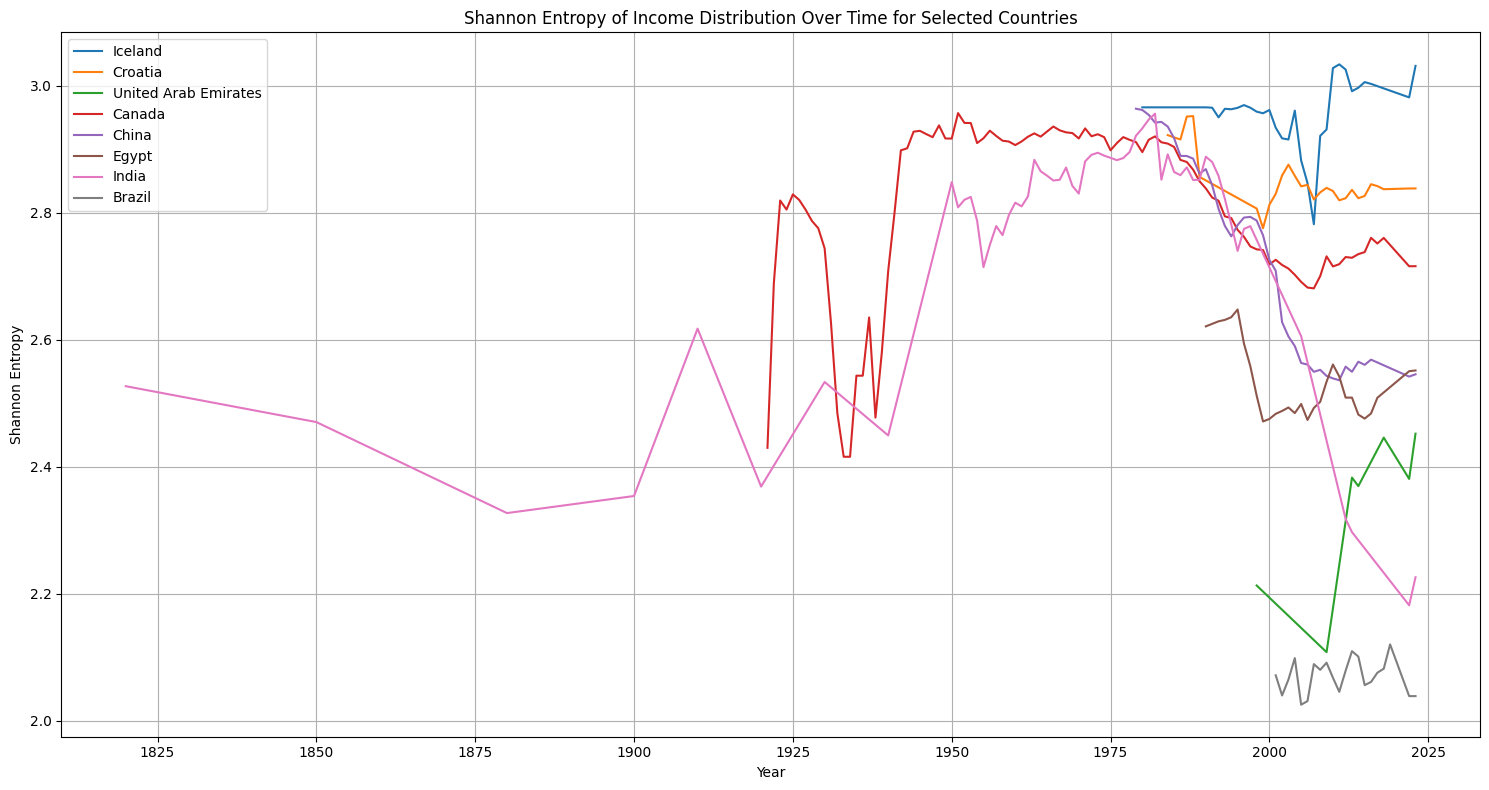

In [12]:
plt.figure(figsize=(15, 8))

for country, data in yearly_entropy_data.items():
    years = list(data.keys())
    entropy_values = list(data.values())
    if years and entropy_values:
        plt.plot(years, entropy_values, linestyle='-', label=country)

plt.title('Shannon Entropy of Income Distribution Over Time for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Shannon Entropy')
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('yearly_entropy.jpg')
plt.show()
